### scipy.stats.norm

##### A normal continuous random variable.<br>The location(loc) keyword specifies the mean. The scale(scale) keyword specifies the standard deviation.<br>As an instance of the rv_continuous class, norm object inherits from it a collection of generic methods, and completes them with details specific for this particular distribution. The pdf for norm is : 

##### $$f(x) = \frac{exp(\frac{-x^2}{2})}{\sqrt{2\pi}}$$

##### The pdf above is defined in the "standardized" form. To shift and/or scale the distribution use the loc and scale parameters. Specifically, norm.pdf(x, loc, scale) is identically equivalent to norm.pdf(y)/scale with y = (x-loc)/scale. Note that shifting the location of a distribution does not make it a "noncentral" distribution; noncentral generalizations of some distributions ara available in separate classes.

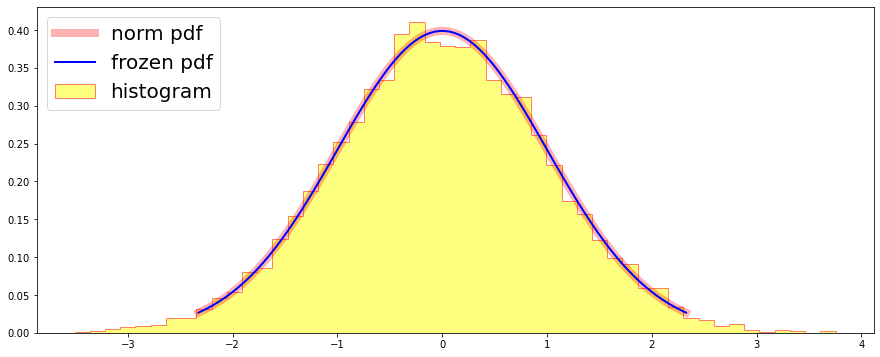

In [34]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 6))

# Calculate the first four moments
mean, var, skew, kurt = norm.stats(moments='mvsk')

# Display the pdf
x = np.linspace(start=norm.ppf(0.01), stop=norm.ppf(0.99), num=100)
ax.plot(x, norm.pdf(x), 'r-', lw=8, alpha=0.3, label='norm pdf')

# Alternatively, the distribution object can be called(as a function) to fix the shape, location and scale
# parameters. This returns a "frozen" RV object holding the given parameters fixed.
# Freeze the distribution and display the frozen pdf:
rv = norm()
ax.plot(x, rv.pdf(x), 'b-', lw=2, label='frozen pdf')

# Generate random numbers & compare the histogram:
r = norm.rvs(size=10000)
ax.hist(x=r, density=True, histtype='stepfilled', alpha=0.5, bins=50, color='yellow', edgecolor='red', label='histogram')

plt.legend(fontsize=20, loc='upper left')
plt.show()

In [25]:
# Check the accuracy of cdf and ppf:
vals = norm.ppf(q=[0.001, 0.5, 0.999])
print(vals)

np.allclose(a=[0.001, 0.5, 0.999], b=norm.cdf(x=vals))

[-3.09023231  0.          3.09023231]


True

In [49]:
# Calculate a 90% & 95% confidence interval for a norm dist with mu=100, sigma=25
intl_90 = norm.interval(alpha=0.90, loc=100, scale=25)
intl_90 = [round(x, 3) for x in intl_90]

intl_95 = norm.interval(alpha=0.95, loc=100, scale=25)
intl_95 = [round(x, 3) for x in intl_95]

print(f"90% confidence interval for a normal dist with (100, 25) is {intl_90}\n\
95% confidence interval for a normal dist with (100, 25) is {intl_95}")


90% confidence interval for a normal dist with (100, 25) is [58.879, 141.121]
95% confidence interval for a normal dist with (100, 25) is [51.001, 148.999]
